# Manual Neural Network
* Going through these basic [lessons](https://www.udemy.com/complete-guide-to-tensorflow-for-deep-learning-with-python/learn/lecture/8073746#content) helps to understand tensorflow 1.X logic well

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Simple OOP

In [1]:
class SimpleClass():
    
    def __init__(self, name):
        print('hello', name)
        
    def say_hi(self):
        print('Hi!')

In [2]:
x = SimpleClass('tom')
x.say_hi()

hello tom
Hi!


In [3]:
class ExtendedSimpleClass(SimpleClass):
    
    def __init__(self, name):
        super().__init__(name)
        print('Extended')

In [4]:
y = ExtendedSimpleClass('tom')
y.say_hi()

hello tom
Extended
Hi!


## Neural Network Classes

### Operation

In [43]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
#         for node in input_nodes:
#             node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [44]:
class add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
            
    def compute(self, x, y):
        self.inputs = [x, y]
        return x + y

In [45]:
class multiply(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
            
    def compute(self, x, y):
        self.inputs = [x, y]
        return x * y

In [46]:
class matmul(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
            
    def compute(self, x, y):
        self.inputs = [x, y]
        return x.dot(y)

### Placeholders, Variables, Graphs

In [47]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [48]:
class Variable():
    
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [49]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

### Post Order Traversal of Nodes, & Session Classes

In [50]:
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    recurse(operation)
    return nodes_postorder

In [51]:
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

### Sample Topology

In [52]:
# Calculate z = Ax + b
g = Graph()
g.set_as_default()

A = Variable(10)
b = Variable(1)
x = Placeholder()

y = multiply(A, x)
z = add(y, b)

In [53]:
sess = Session()
sess.run(z, feed_dict={x:10})

101

In [41]:
g = Graph()
g.set_as_default()

A = Variable([[10, 20], [30, 40]])
b = Variable([1, 1])
x = Placeholder()

y = matmul(A, x)
z = add(y, b)

In [42]:
sess.run(z, feed_dict={x:10})

array([[101, 201],
       [301, 401]])

# Sample Classification

In [55]:
def sigmoid(z):
    return (1 + np.exp(-z)) ** -1

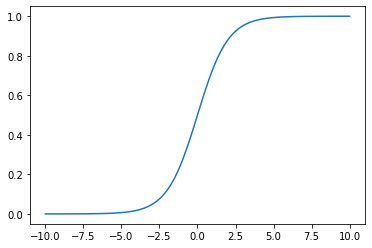

In [56]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z, sample_a)

In [57]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z):
        return sigmoid(z)

In [59]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

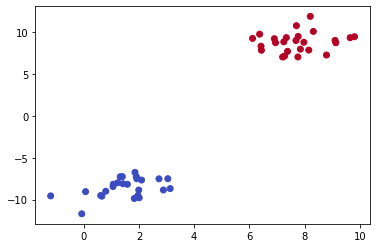

In [64]:
plt.scatter(x=data[0][:, 0], y=data[0][:, 1], c=data[1], cmap='coolwarm')

#### By inspection, a line of <i>Feature2 = -1 * Feature1 + 5</i> appears to be a good classification line

To achieve this, rearrange equation to show:

w*F - 5 = 0

[1, 1] * [[F1], [F2]] - 5 = 0

In [65]:
g = Graph()
g.set_as_default()
w = Variable([1, 1])
b = Variable(-5)
x = Placeholder()
z = add(matmul(w, x), b)
a = Sigmoid(z)

In [66]:
sess = Session()
sess.run(operation=a, feed_dict={x:[10, 10]})

0.999999694097773

# Some Notes
* Variables are like your weights & biases
* Placeholders are like your input data